# Hex Grid Rendering Demo

This notebook demonstrates how to generate and render hex grids using the goldberg-hexgrid package.

**Note:** For interactive 3D plots, make sure you have installed the notebook dependencies:
```bash
pip install -e ".[notebooks]"
```

This includes `ipympl` which enables interactive matplotlib widgets in Jupyter notebooks.

**If you get a "backend not recognized" error:**
1. Make sure ipympl is installed: `pip install ipympl`
2. Enable the extension: `jupyter nbextension enable --py --sys-prefix ipympl`
3. Restart your Jupyter kernel/server
4. If using JupyterLab, you may also need: `jupyter labextension install @jupyter-widgets/jupyterlab-manager`

In [1]:
import sys
from pathlib import Path

# Add parent directory to path to import goldberg_hexgrid
sys.path.insert(0, str(Path().resolve().parent))

# Enable interactive matplotlib backend for 3D plots
# Use ipympl backend for interactive widgets in Jupyter
# If this doesn't work, try: jupyter nbextension enable --py --sys-prefix ipympl
# Then restart the kernel
%matplotlib ipympl

from goldberg_hexgrid import generate_goldberg_hex_sphere
from goldberg_hexgrid.rendering import (
    render_hex_grid_3d,
    render_hex_grid_2d_projection,
    render_hex_grid_interactive,
)
import matplotlib.pyplot as plt

## Generate a Goldberg Hex Sphere

Let's generate a hex grid with parameters m=5, n=5 (this creates approximately 720 tiles).

In [2]:
# Generate hex grid
m, n = 5, 5
hex_coords, positions, neighbors_map = generate_goldberg_hex_sphere(m=m, n=n)

print(f"Generated {len(hex_coords)} hex tiles")
print(f"Number of neighbors per tile: {[len(neighbors_map[i]) for i in range(min(10, len(neighbors_map)))]}")

Finding neighbors:   0%|          | 0/752 [00:00<?, ?it/s]

Finding neighbors: 100%|██████████| 752/752 [00:00<00:00, 33684.15it/s]

Generated 752 hex tiles
Number of neighbors per tile: [5, 6, 6, 6, 6, 6, 6, 6, 6, 6]


## 3D Interactive Rendering

Render the hex grid in 3D. You can rotate and zoom the plot interactively.

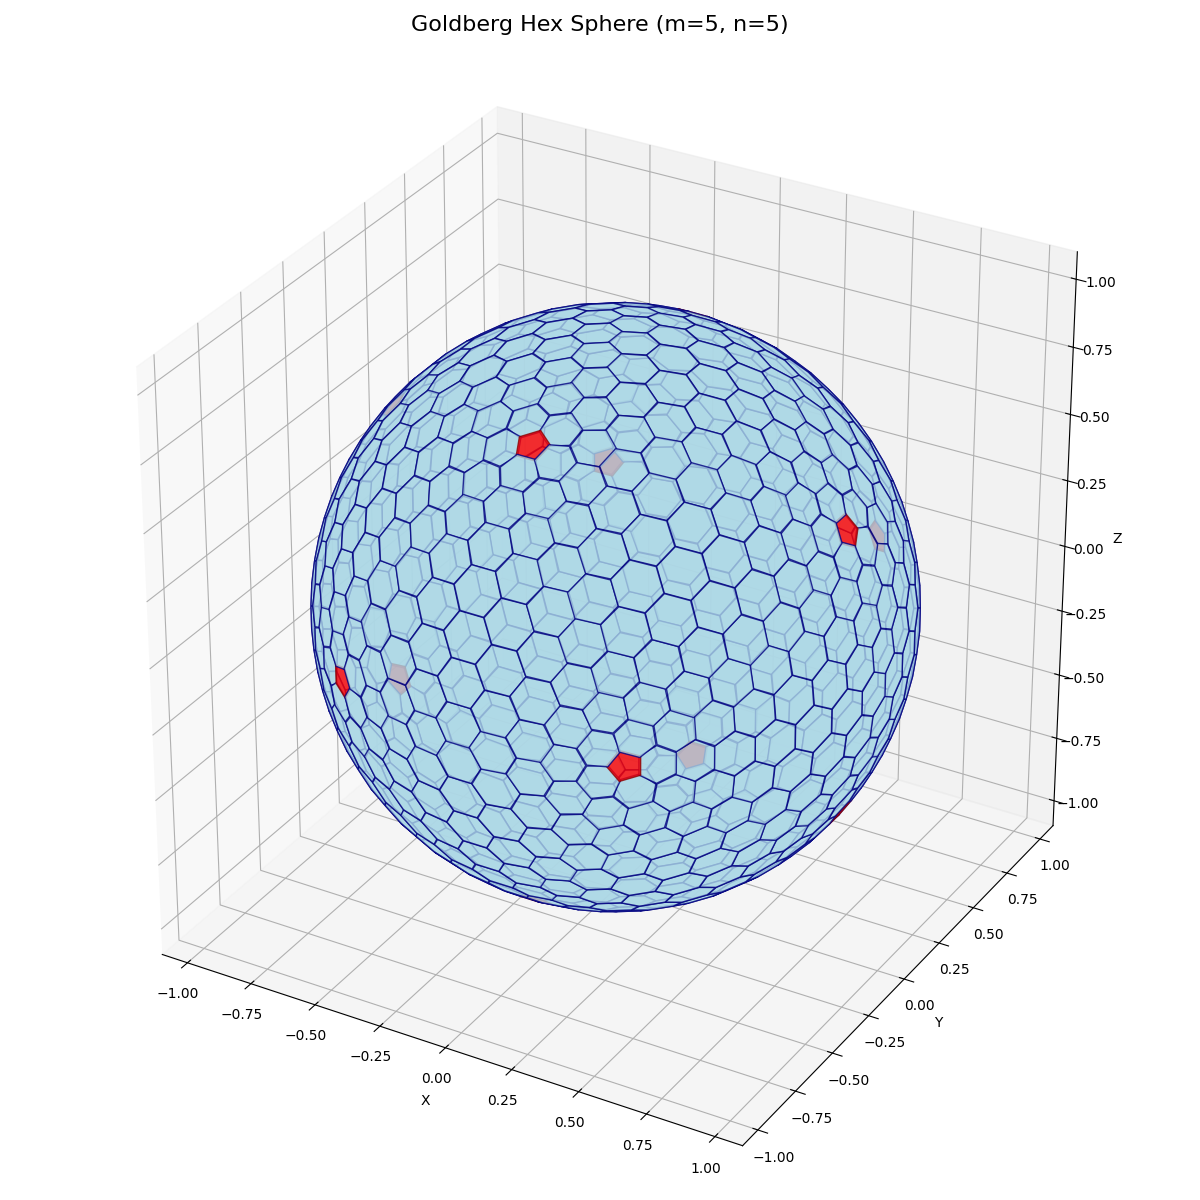

In [4]:
# Render in 3D with interactive controls
fig, ax = render_hex_grid_interactive(
    positions,
    neighbors_map,
    figsize=(12, 12),
    alpha=0.8,
    face_color="lightblue",
    edge_color="navy",
)

plt.title(f"Goldberg Hex Sphere (m={m}, n={n})", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

## 2D Map Projection

Render the hex grid using a Mollweide projection (equal-area map projection).

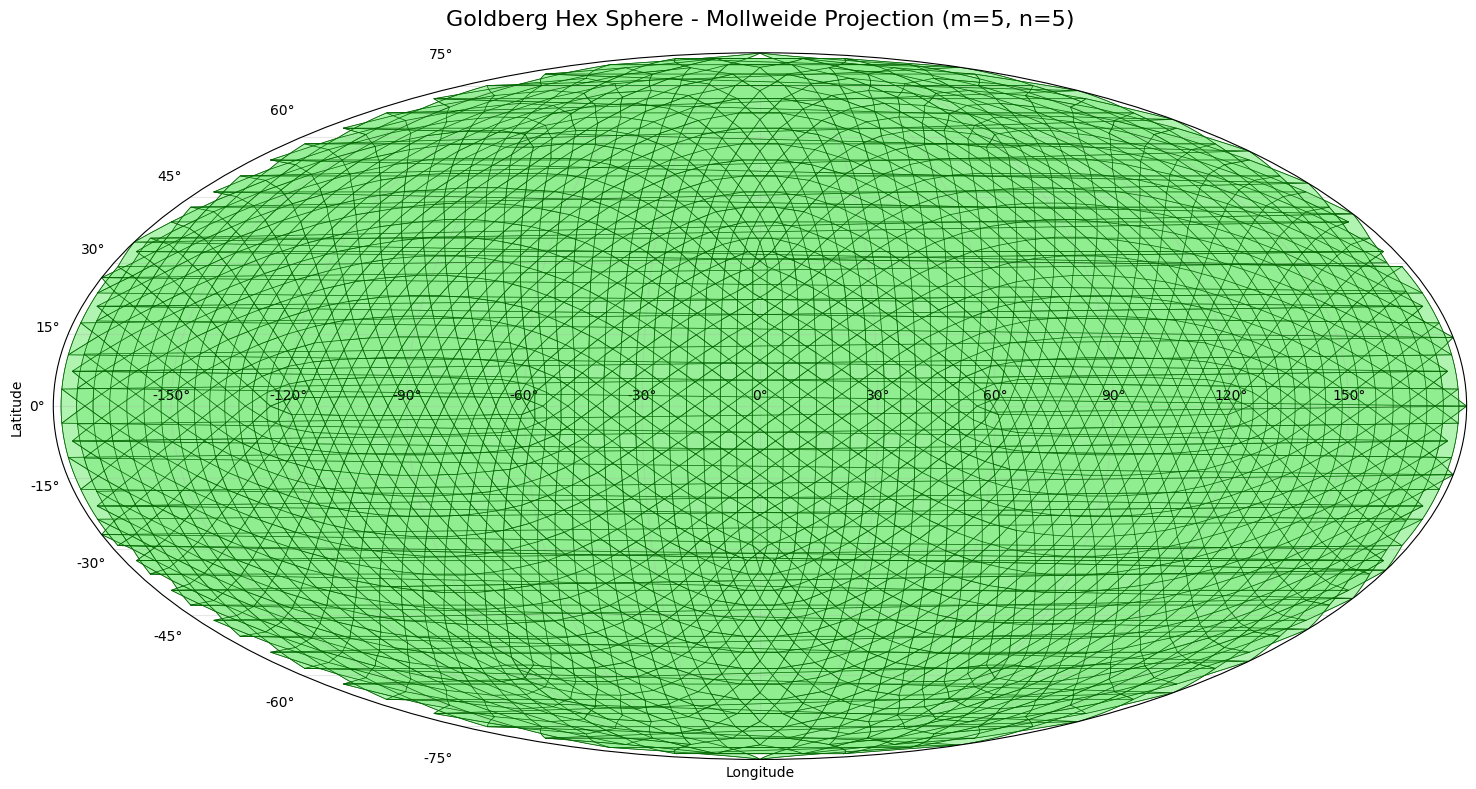

In [4]:
# Render as 2D map projection
fig, ax = render_hex_grid_2d_projection(
    positions,
    neighbors_map,
    projection="mollweide",
    figsize=(16, 8),
    alpha=0.7,
    face_color="lightgreen",
    edge_color="darkgreen",
)

plt.title(f"Goldberg Hex Sphere - Mollweide Projection (m={m}, n={n})", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

## Multiple Views

Create a figure with multiple 3D views from different angles.

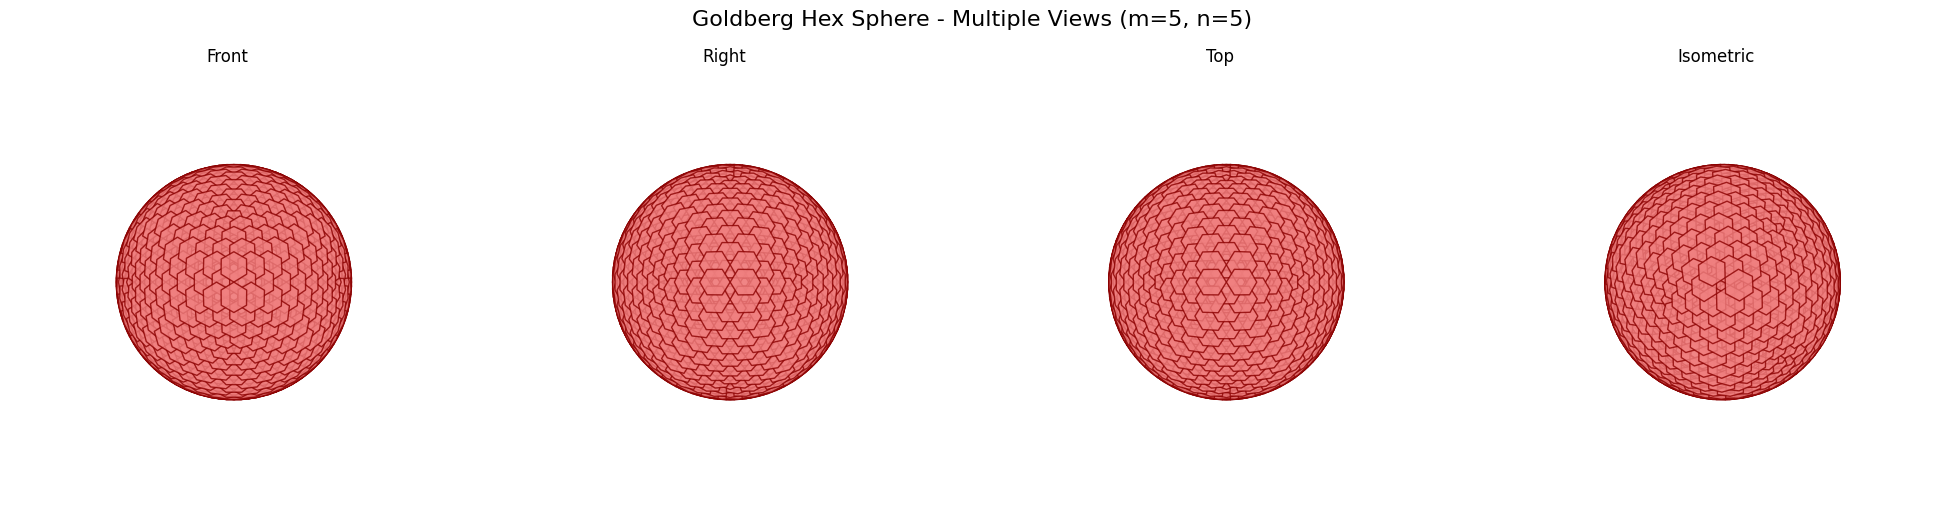

In [5]:
# Create a figure with multiple views
fig = plt.figure(figsize=(20, 5))

views = [
    ("Front", (0, 0)),
    ("Right", (90, 0)),
    ("Top", (0, 90)),
    ("Isometric", (45, 30)),
]

for idx, (title, (elev, azim)) in enumerate(views, 1):
    ax = fig.add_subplot(1, 4, idx, projection="3d")
    
    # Render the grid
    render_hex_grid_3d(
        positions,
        neighbors_map,
        alpha=0.8,
        face_color="lightcoral",
        edge_color="darkred",
        show_axes=False,
        ax=ax,
    )
    
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(title, fontsize=12)

plt.suptitle(f"Goldberg Hex Sphere - Multiple Views (m={m}, n={n})", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Smaller Grid Example

Generate and render a smaller grid for faster rendering and clearer visualization.

In [ ]:
# Generate a smaller grid
m_small, n_small = 3, 3
hex_coords_small, positions_small, neighbors_map_small = generate_goldberg_hex_sphere(m=m_small, n=n_small)

print(f"Generated {len(hex_coords_small)} hex tiles")

# Render
fig, ax = render_hex_grid_interactive(
    positions_small,
    neighbors_map_small,
    figsize=(12, 12),
    alpha=0.9,
    face_color="lightyellow",
    edge_color="orange",
)

plt.title(f"Smaller Goldberg Hex Sphere (m={m_small}, n={n_small})", fontsize=16, pad=20)
plt.tight_layout()
plt.show()